<a href="https://colab.research.google.com/github/adnaen/machine-learning-notes/blob/main/DEEP_LEARNING/FNN/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feed Forward Neural Network**

In [1]:
import torch
from torch import Tensor
from torch import nn

## **Dummy Data**

In [10]:
# dummy data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x, y = make_regression(n_samples=1000, n_features=10)
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

# normalize data
scaler = StandardScaler()
x_train = torch.tensor(scaler.fit_transform(x_train.numpy()), dtype=torch.float32)
x_test = torch.tensor(scaler.transform(x_test.numpy()), dtype=torch.float32)

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

((torch.Size([800, 10]), torch.Size([800, 1])),
 (torch.Size([200, 10]), torch.Size([200, 1])))

## **Model Architecture**

In [5]:
class FeedForwardNN(nn.Module):
    def __init__(self, ip_features: int, h1_features: int, h2_features: int, op_features: int) -> None:
        super().__init__()

        # linear layers
        self.ip_layer = nn.Linear(ip_features, h1_features)
        self.h1_layer = nn.Linear(h1_features, h2_features)
        self.h2_layer = nn.Linear(h2_features, op_features)

        # activation
        self.relu = nn.ReLU()

    def forward(self, x: Tensor) -> Tensor:
        z1 = self.ip_layer(x)
        a1 = self.relu(z1)

        z2 = self.h1_layer(a1)
        a2 = self.relu(z2)

        return self.h2_layer(a2)


## **Training**

In [16]:
model = FeedForwardNN(ip_features=10, h1_features=15, h2_features=10, op_features=1)

epochs = 2000
criterion = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for i in range(epochs+1):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()

    if i % 500 == 0:
        print(f"Epoch : {i}, Loss : {loss.item()}")

Epoch : 0, Loss : 41832.8828125
Epoch : 500, Loss : 11.685770034790039
Epoch : 1000, Loss : 1.4105660915374756
Epoch : 1500, Loss : 0.42751771211624146
Epoch : 2000, Loss : 0.18066489696502686


## **Testing**

In [17]:
model.eval()
# turn of gradient calculation
with torch.no_grad():
    y_test_pred = model(x_test)

In [24]:
y_test_pred[:5]   # model predict

tensor([[ 103.7029],
        [ 215.7287],
        [ 224.0121],
        [ 208.9366],
        [-173.0688]])

In [26]:
y_test[:5]      # looks same, right!!

tensor([[ 103.1731],
        [ 215.5997],
        [ 223.9908],
        [ 208.9307],
        [-173.0240]])

## **Evaluation**

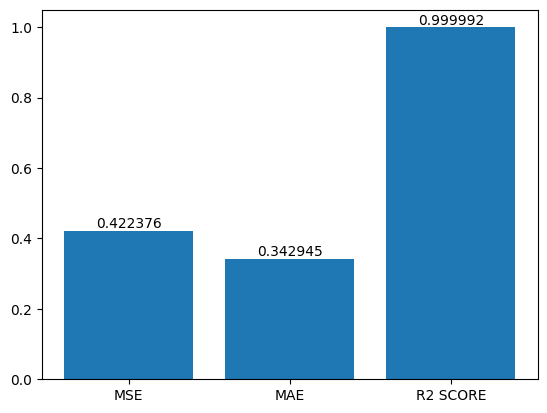

In [22]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_loss = mean_squared_error(y_test.numpy(), y_test_pred.numpy())
mae_loss = mean_absolute_error(y_test.numpy(), y_test_pred.numpy())
r2_ = r2_score(y_test.numpy(), y_test_pred.numpy())

ax = plt.bar(x=["MSE", "MAE", "R2 SCORE"], height=[mse_loss, mae_loss, r2_])
plt.bar_label(ax)
plt.show()
